## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import gradient_descent_v2
import numpy as np

## Data pre-proccesing

Implmeniting function ploting any photo in dataset by it's index

In [2]:

def digit_plot(X, y, index):
    img = X[index].reshape(28,28)
    plt.imshow(img)
    plt.title('True label: %d' % y[index])
    plt.show()

Splitting data to test and train data

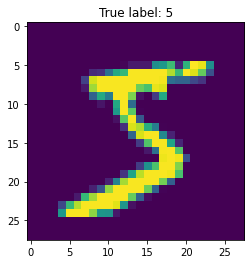

5


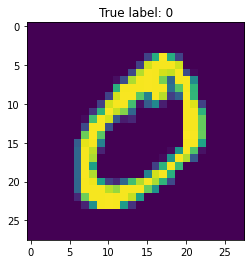

0


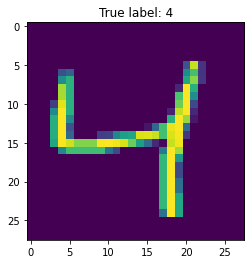

4


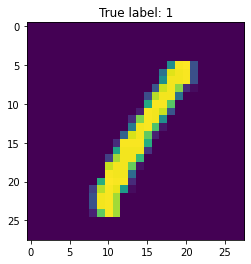

1


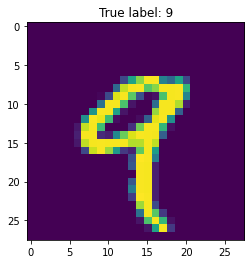

9


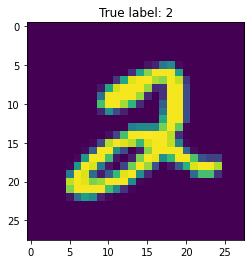

2


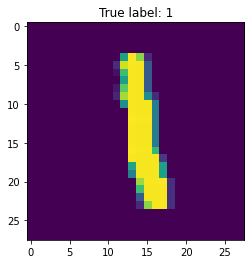

1


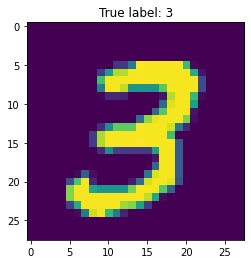

3


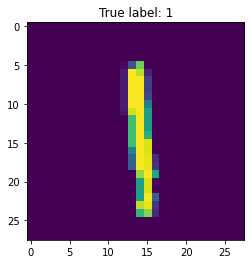

1


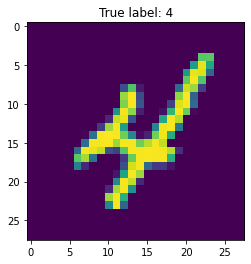

4
X_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
X_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #spliting data

for i in range(10):
    digit_plot(X_train,y_train, i)#Ploting 10 digits just to make sure of data shape
    print(y_train[i])
    
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)
#perfecto

In [4]:
X_train.reshape(60000,784) #Converting the 2D matrix to 1D to make it simpler 
X_test.reshape(10000, 784) 
y_train = keras.utils.to_categorical(y_train, 10) #Convert from vector to binary matrix of 10 columns the same number of output
y_test = keras.utils.to_categorical(y_test, 10)


print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

y_train shape :  (60000, 10)
y_test shape :  (10000, 10)


In [5]:
#The data is ready for training the model
#Model implementing

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(250, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)]) #softmax predict with precentages or ratio %%%%%%%
model.compile(optimizer=gradient_descent_v2.SGD(0.001), loss =  'categorical_crossentropy', metrics= ["accuracy"])
#model.fit(X_train, y_train, batch_size = 32, epochs = 15, verbose = 1)

model.load_weights('Mnist_NN')

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0144 - accuracy: 0.8463
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.9151
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2421 - accuracy: 0.9334
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1922 - accuracy: 0.9448
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1617 - accuracy: 0.9529
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1395 - accuracy: 0.9581
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1233 - accuracy: 0.9634
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1111 - accuracy: 0.9665
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0984 - accuracy: 0.9701
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.090

In [11]:
accuracy = model.evaluate(x= X_test, y= y_test)

print('Accuracy: ', accuracy[1])
print(model.summary())

313/313 [==============================] - 1s 2ms/step - loss: 0.2483 - accuracy: 0.9542
Accuracy:  0.954200029373169
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 10)                2510      
                                                                 
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________
None


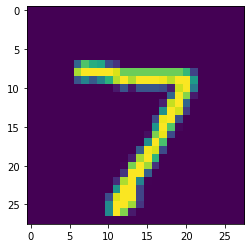

prediction is:  7
True vlaue is:  7


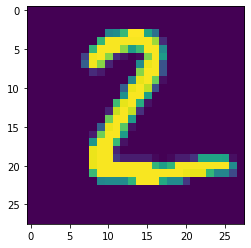

prediction is:  2
True vlaue is:  2


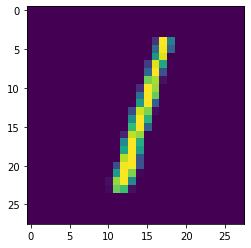

prediction is:  1
True vlaue is:  1


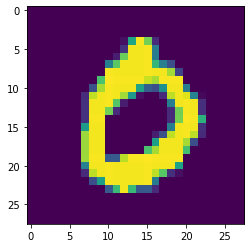

prediction is:  0
True vlaue is:  0


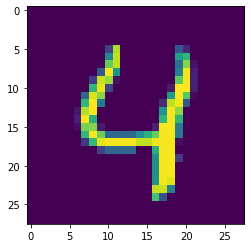

prediction is:  4
True vlaue is:  4


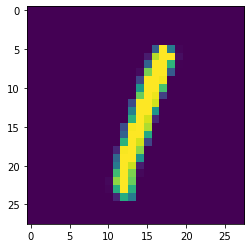

prediction is:  1
True vlaue is:  1


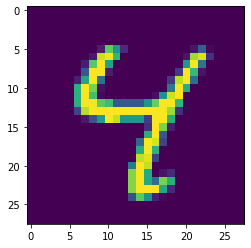

prediction is:  4
True vlaue is:  4


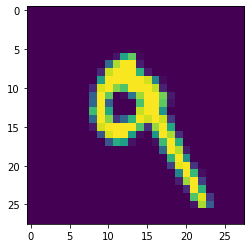

prediction is:  9
True vlaue is:  9


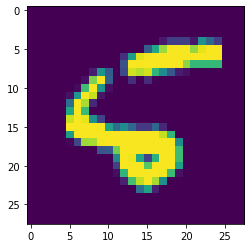

prediction is:  5
True vlaue is:  5


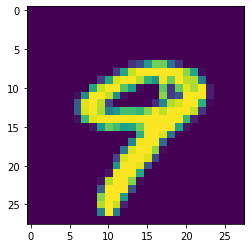

prediction is:  9
True vlaue is:  9


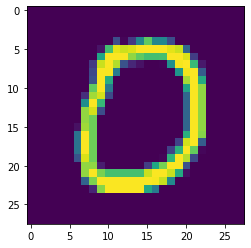

prediction is:  0
True vlaue is:  0


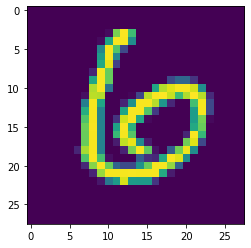

prediction is:  6
True vlaue is:  6


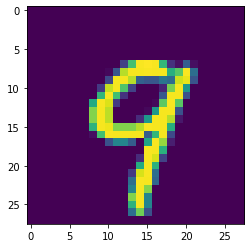

prediction is:  9
True vlaue is:  9


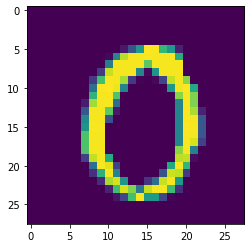

prediction is:  0
True vlaue is:  0


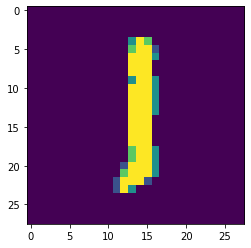

prediction is:  1
True vlaue is:  1


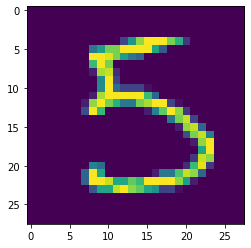

prediction is:  5
True vlaue is:  5


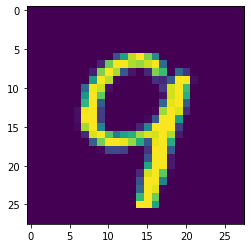

prediction is:  9
True vlaue is:  9


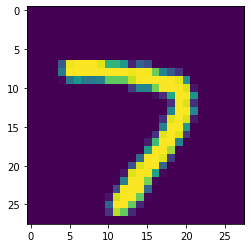

prediction is:  7
True vlaue is:  7


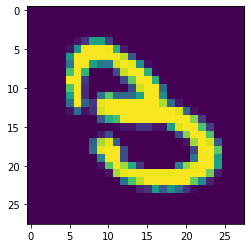

prediction is:  3
True vlaue is:  3


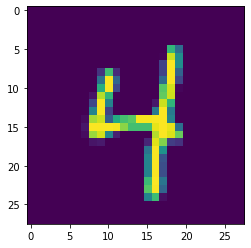

prediction is:  4
True vlaue is:  4


In [13]:
#predictions

for i in range(20):
    img = X_test[i]
    predict_x=model.predict(X_test) 
    classes_x=np.argmax(predict_x,axis=1)
    plt.imshow(X_test[i])
    plt.show()
    print('prediction is: ',classes_x[i])
    print('True vlaue is: ', np.argmax(y_test[i]))
    

In [8]:
#model.save('Mnist_NN')

INFO:tensorflow:Assets written to: Mnist_NN\assets
